In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mrwellsdavid/unsw-nb15


Dataset URL: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
License(s): unknown
unsw-nb15.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/unsw-nb15.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv('UNSW_NB15_training-set.csv')
test_df=pd.read_csv('UNSW_NB15_testing-set.csv')

In [ ]:
train_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
test_df.loc[10:50]


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
10,11,0.304853,tcp,-,FIN,12,6,4142,268,55.764583,...,1,3,0,0,0,1,6,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
12,13,0.416952,tcp,-,FIN,10,6,534,268,35.975363,...,1,40,0,0,0,1,39,0,Normal,0
13,14,0.996221,tcp,-,FIN,10,8,564,354,17.064487,...,1,3,0,0,0,2,3,0,Normal,0
14,15,0.576755,tcp,-,FIN,10,8,534,354,29.475254,...,1,40,0,0,0,1,39,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
16,17,0.728252,tcp,-,FIN,10,6,534,268,20.597266,...,1,40,0,0,0,2,39,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
18,19,0.387852,tcp,-,FIN,10,6,534,268,38.674545,...,1,40,0,0,0,2,39,0,Normal,0
19,20,0.537840,tcp,-,FIN,10,8,534,354,31.607913,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
# Combine datasets for preprocessing
df = pd.concat([train_df, test_df], axis=0)

In [ ]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [ ]:
df['attack_cat'].value_counts()

,count
attack_cat,
Normal,93000
Generic,58871
Exploits,44525
Fuzzers,24246
DoS,16353
Reconnaissance,13987
Analysis,2677
Backdoor,2329
Shellcode,1511


In [ ]:
df.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
df.shape

(257673, 45)

In [ ]:
df['label'].value_counts()

,count
label,
1,164673
0,93000


In [ ]:
X=df.drop(columns=['label','attack_cat'])
y = df['label']

In [ ]:
cat_col= X.select_dtypes(include='object').columns
num_col= X.select_dtypes(exclude='object').columns

In [ ]:
X = pd.get_dummies(X, columns=cat_col, drop_first=True)


In [ ]:
# Scale numerical columns
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()

In [ ]:
param_grid={
    'n_estimators': [50,100],
    'max_depth': [5,9],
    'learning_rate': [0.05, 0.1, 0.2,0.3]

}

In [ ]:
# Step 4: Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',   # You can choose other scoring metrics
                           cv=3,                 # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)            # Use all available cores

# Step 5: Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Step 6: Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Step 7: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 100}
Best Cross-Validation Score: 0.9890510242354722
Confusion Matrix:
[[18344   179]
 [  322 32690]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18523
           1       0.99      0.99      0.99     33012

    accuracy                           0.99     51535
   macro avg       0.99      0.99      0.99     51535
weighted avg       0.99      0.99      0.99     51535



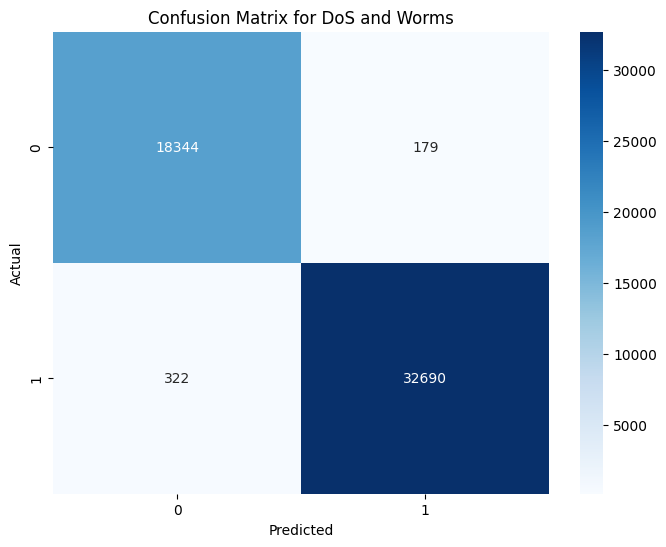

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DoS and Worms')
plt.show()